<a href="https://colab.research.google.com/github/AyaTareekAhmmeed/Deep-Neural-Network/blob/main/ResNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Residual Network Block
#use Residual Blocks so it depends on blocks not layers
#152 layers
# Use of shortcut connections means "skip some connections making double insurance".
#Development and repetition of the residual blocks.
#Development of very deep (152-layer) models.

In [2]:
# example of a CNN model with an identity or projection residual module
from keras.models import Model
from keras.layers import Input
from keras.layers import Activation
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import add
from keras.utils import plot_model

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 256, 256, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_2 (Conv2D)              (None, 256, 256, 64  36928       ['conv2d_1[0][0]']               
                                )                                                             

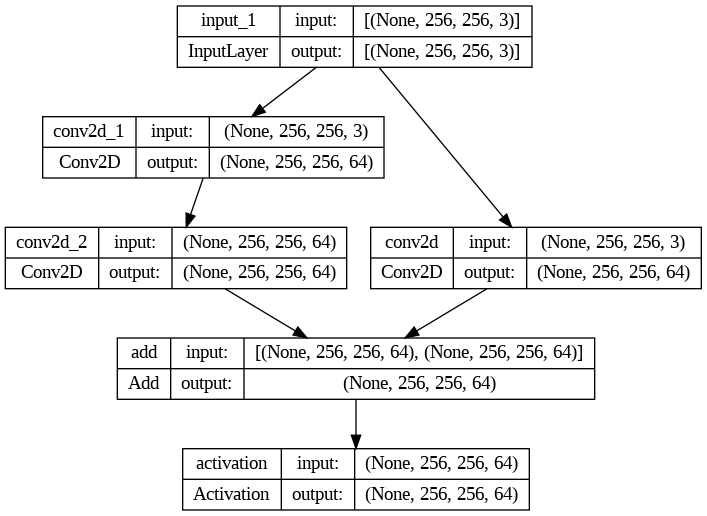

In [3]:
# function for creating an identity or projection residual module
def residual_module(layer_in, n_filters):
  merge_input = layer_in
  # check if the number of filters needs to be increase, assumes channels last format
  if layer_in.shape[-1] != n_filters:
    merge_input = Conv2D(n_filters, (1,1), padding='same', activation='relu', kernel_initializer='he_normal')(layer_in)
  # conv1
  conv1 = Conv2D(n_filters, (3,3), padding='same', activation='relu', kernel_initializer='he_normal')(layer_in)
  # conv2
  conv2 = Conv2D(n_filters, (3,3), padding='same', activation='linear', kernel_initializer='he_normal')(conv1)
  # add filters, assumes filters/channels last
  layer_out = add([conv2, merge_input])
  # activation function
  layer_out = Activation('relu')(layer_out)
  return layer_out

# define model input
visible = Input(shape=(256, 256, 3))
# add vgg module
layer = residual_module(visible, 64)
# create model
model = Model(inputs=visible, outputs=layer)
# summarize model
model.summary()
# plot model architecture
plot_model(model, show_shapes=True, to_file='residual_module.png')